# INTRODUCTION

## Terminologies

* Most famous Unsupervised Learning Techniques. 
* PCA is a dimensionality reduction technique that allows you to compress a dataset into a lower dimensional space with fewer features while maintaining as much of the original information as possible.
* **The curse of dimensionality** is a general mathematical problem relating to the exploding size of space as you continue to add additional dimensions. This can be particularly problematic when dealing with large datasets. The more features you have, the more data you have about the scenario, but the more difficult it might be to exhaustively explore combinations of these features.
* The curse of dimensionality is certainly one motivating factor for PCA. If you can't process all of the information at your disposal, then an alternative path around is necessary. Dimensionality reduction techniques such as PCA can be essential in such situations. PCA can also help improve regression and classification algorithms in many cases. In particular, algorithms are less prone to overfitting when the underlying data itself has first been compressed, reducing noise or other anomalies.
* PCA can also be helpful for visualizing the structure of large datasets. After all, you are limited to 2 or 3 dimensions when visualizing data. As such, reducing a dataset to 2 or 3 primary features is monumental in creating a visualization.

## Unsupervised Learning Introduction

* In `**supervised learning**`, you define an `X` and `y`, and the algorithm attempts to generalize this transformation in order to predict `y` given `X`. In `**unsupervised learning**`, you do not define an `X` or `y`. Instead, you feed in a given dataset and the unsupervised learning algorithm returns some new representation of the data based on the structure and patterns within the data itself.


* **Supervised vs. Unsupervised Learning:** The main difference between supervised and unsupervised learning are their goals. Supervised learning needs concrete, ground-truth labels to train models that answer very specific questions. Unsupervised learning differs in that the task it is trying to accomplish is much less well-defined - it can usually be summed up as "are there any natural patterns in this data that are recognizable?"


* To illustrate this, assume that you have a basket of various different kinds of fruit. A supervised learning task would be building an apple classifier that tells us if a given fruit is or isn't an apple, based on the size, shape, color, texture, taste, and any other data that you've encoded for each piece of fruit. An unsupervised learning task on the same data would analyze only the features, and sort them into groups without being told what type of fruit each was. In general, supervised learning uses data to accomplish a clear task while unsupervised learning has no clear task, but is instead used to identify patterns.


* **Unsupervised Learning Techniques:**
    * **Clustering:** Clustering groups data into homogeneous groups, where members share common traits. One common use-case for clustering is market segmentation. In market segmentation, you would try to decompose an audience into subsets for more precise targeting for business purposes, such as advertising. Even though there's no way to verify that these groups are correct, in practice it usually does quite well, often providing useful subgroups which can then be individually examined.
    
    * **Dimentionality Reduction:** attempts to reduce the overall number of features of a dataset while preserving as much information as possible. The most common dimensionality reduction algorithm is **Principal Component Analysis (PCA)**. Dimensionality reduction algorithms work by projecting data from its current n-dimensional subspace into a smaller subspace, while losing as little information as possible in the process. Dimensionality reduction algorithms still lose some information, but you can quantify this information loss to make an informed decision about the number of dimensions reduced versus the overall information lost. The curse of dimensionality is a key concept as datasets scale. In short, as the number of features in a dataset increases, the processing power and search space required to optimize a given machine learning algorithm explodes exponentially. Because this often creates intractable computational problems, dimensionality reduction techniques such as PCA can be an essential preprocessing technique.
    

### More About The Curse of Dimensionality
The curse of dimensionality is based on the exploding volume of n-dimensional spaces as the number of dimensions, n, increases. Points in n-dimensional space become increasingly sparse as the number of dimensions increases. That is, the distance between points will continue to grow as the number of dimensions grows.

This can be problematic in a number of machine learning algorithms, in particular, when clustering points into groups. Due to the exploding nature of n-dimensional space, there is also an unwieldy number of possible combinations when searching for optimal parameters for a machine learning algorithm.

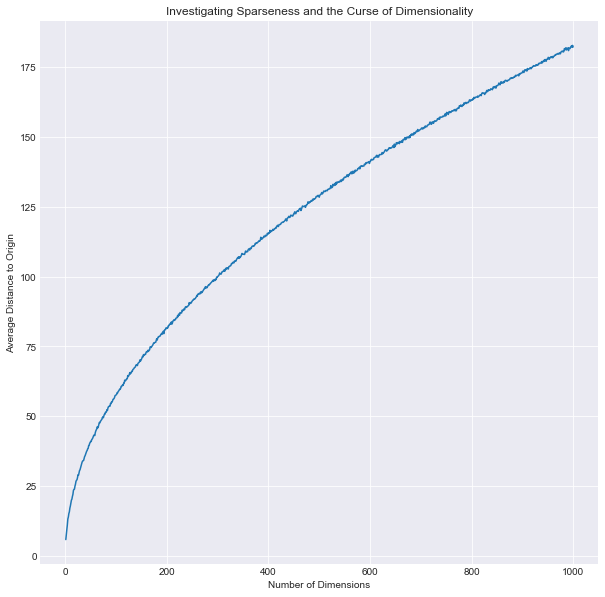

This image demonstrates how the average distance between points and the origin continues to grow as the number of dimensions increases, even though each dimension has a fixed range. Simply increasing the number of dimensions continues to make individual points more and more sparse.

**Implications:** Optimization problems can become infeasible as the number of features increases, The practical limit will vary based on your particular computer and the time that you have to invest in a problem.

The sparsity of points also has additional consequences. Due to the sheer scale of potential points in an n-dimensional space, as n continues to grow, the probability of seeing a particular point (or even nearby point) continues to plummet. Therefore, it is likely that there are entire regions of an n-dimensional space that have yet to be explored.

The curse of dimensionality presents an intriguing paradox. On the one hand, more features allow one to account for variance and nuances required to accurately model a given machine learning model. On the other hand, as the number of dimensions increases, the accompanying volume of the hyperspace explodes exponentially. As such, the potential amount of information required to accurately model such a space becomes increasingly complex. (This is not always the case; a simple line can still exist in a 10-dimensional space, but the problems one is likely to be tackling when employing 10 features are most likely more complex than a 2-dimensional model.) With this, more and more observations will be required to produce an adequate model.

## The Curse of Dimensionality - Practical Illustration
We shall proceed to conduct some mathematical simulations to further investigate the consequences of the curse of dimensionality.


**Euclidean Distance:** we write a function which takes two points, p1 and p2, and returns the Euclidean distance between them. Euclidean distance between two points is given by:  

$$ d(a,b) = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2 + ... + (a_n - b_n)^2} $$

In [1]:
import numpy as np

def euclidean_distance(p1, p2):
    p1, p2 = np.array(p1), np.array(p2) # Ensure p1 and p2 are NumPy arrays
    return np.sqrt(np.sum(np.square(p2 - p1)))

**Average Distance From the Origin:** To examine the curse of dimensionality, we will investigate the average distance to the center of n-dimensional space. As we shalll see, this average distance increases as the number of dimensions increases. 


To investigate this, generate 100 random points for various n-dimensional spaces. Investigate n-dimensional spaces from n=1 to n=1000. In each of these, construct the 100 random points using a random number between -10 and 10 for each dimension of the point. From there, calculate the average distance from each of these points to the origin. Finally, plot this relationship on a graph; the x-axis will be n, the number of dimensions, and the y-axis will be the average distance from the origin.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

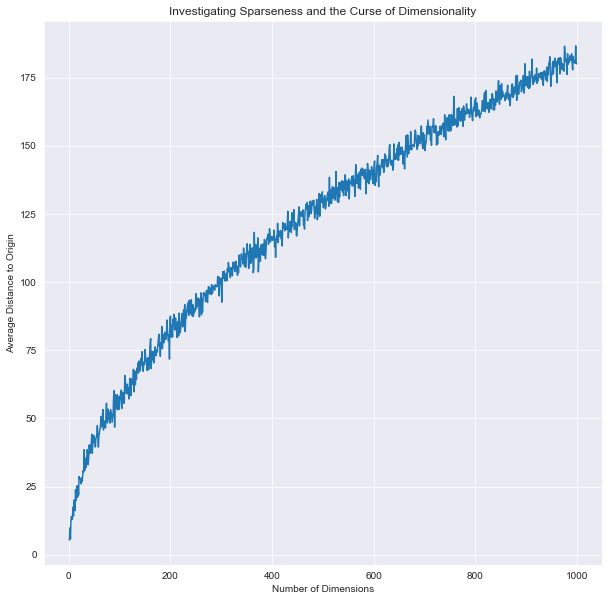

In [3]:
avg_distances = []
for n in range(1, 1001):
    p1 = np.random.uniform(low=-10, high=10, size=n)
    p2 = [0 for i in range(n)]
    distance = np.mean([euclidean_distance(p1 ,p2) for p in range(100)])
    avg_distances.append(distance)
plt.figure(figsize=(10, 10))
plt.plot(range(1, 1001), avg_distances)
plt.xlabel('Number of Dimensions')
plt.ylabel('Average Distance to Origin')
plt.title('Investigating Sparseness and the Curse of Dimensionality');

As mentioned, another issue with increasing the dimension of the feature space is the training time required to fit a machine learning model. While more data will generally lead to better predictive results, it will also substantially increase training time.

To demonstrate this, generate lists of random numbers as you did above. Then, use this list of random numbers as a feature in a mock dataset; choose an arbitrary coefficient and multiply the feature vector by this coefficient. Then, sum these feature-coefficient products to get an output, `y`. To spice things up (and not have a completely deterministic relationship), add a normally distributed white noise parameter to your output values. Fit an ordinary least squares model to your generated mock data. Repeat this for a varying number of features, and record the time required to fit the model. (Be sure to only record the time to train the model, not the time to generate the data.) Finally, plot the number of features, n, versus the training time for the subsequent model.

In [4]:
import pandas as pd
import datetime
from sklearn.linear_model import LinearRegression, Lasso

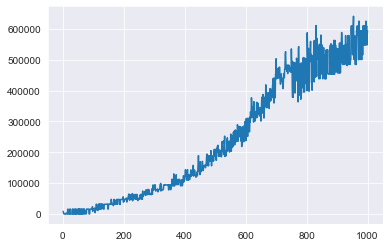

In [5]:
# ⏰ This code will take some time to run 
ols = LinearRegression()

sample_size = 10**3
times = []
for n in range(1,1001):
    xi = [np.random.uniform(low=-10, high=10, size=n) for i in range(sample_size)]
    coeff = np.array(range(1, n+1))
    yi = np.sum(coeff*xi, axis=1) + np.random.normal(loc=0, scale=.1, size=sample_size)
    ols = LinearRegression()
    start = datetime.datetime.now()
    ols.fit(xi, yi)
    end = datetime.datetime.now()
    elapsed = end - start
    times.append(elapsed)
plt.plot(range(1,1001), [t.microseconds for t in times]);

Repeating the same experiment for a Lasso penalized regression model

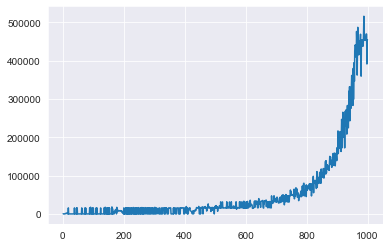

In [6]:
# ⏰ This code will take some time to run 
sample_size = 10**3
times = []
for n in range(1, 1001):
    xi = [np.random.uniform(low=-10, high=10, size=n) for i in range(sample_size)]
    coeff = np.array(range(1, n + 1))
    yi = np.sum(coeff*xi, axis=1) + np.random.normal(loc=0, scale=0.1, size=sample_size)
    lasso = Lasso()
    start = datetime.datetime.now()
    lasso.fit(xi, yi)
    end = datetime.datetime.now()
    elapsed = end - start
    times.append(elapsed)
plt.plot(range(1, 1001), [t.microseconds for t in times]);

Showing Just How Slow it Can Go! Increasing the maximum n from 1000 to 10,000 using Lasso regression

_Note:_ ⏰ _You can expect your code to take over an hour to run on a 2.7 GHz speed CPU!_

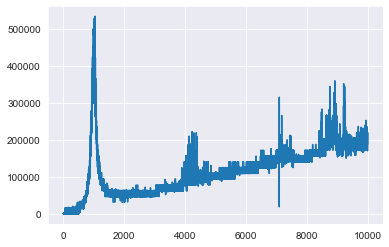

In [7]:
# ⏰ This code will take some time to run
sample_size = 10**3
times = []
for n in range(1, 10001):
    xi = [np.random.uniform(low=-10, high=10, size=n) for i in range(sample_size)]
    coeff = np.array(range(1, n + 1))
    yi = np.sum(coeff*xi, axis=1) + np.random.normal(loc=0, scale=0.1, size=sample_size)
    lasso = Lasso()
    start = datetime.datetime.now()
    lasso.fit(xi, yi)
    end = datetime.datetime.now()
    elapsed = end - start
    times.append(elapsed)
plt.plot(range(1, 10001), [t.microseconds for t in times]);

In summary, we have conducted various simulations to investigate the curse of dimensionality. This demonstrated some of the caveats of working with large datasets with an increasing number of features. With that, we will further explore principal component analysis, a means of reducing the number of features in a dataset while preserving as much information as possible.